# Music genre classification using Machine Learning
### Feature-based classification of music genre using SVM with Scikit-Learn.

## Summary
This project aims to develop a music genre classifier using Machine Learning algorithms with [Scikit-Learn](https://scikit-learn.org/). The classifier is trained on a dataset of precomputed audio features labeled with their genre, and uses a Support Vector Machine (SVM) with a linear kernel to predict the genre of new audio files based on their features.

## Dataset

The dataset used for this project consists of the audio features of songs corresponding to 10 different genres: Blues, Classical, Country, Disco, Hip-hop, Jazz, Metal, Pop, Reggae, and Rock. For each audio file a set of 240 audio features labeled with its corresponding genre is provided in an [ARFF file](https://www.cs.waikato.ac.nz/ml/weka/arff.html).

## Installation

To run this project, Python 3 and several Python libraries need to be installed, including Scikit-Learn, Pandas, Numpy, Matplotlib, Seaborn, and Scipy. You can install these libraries using:

```
pip install scikit-learn pandas numpy matplotlib seaborn scipy
```

## Usage

To use this classifier, you need to follow these steps:

1. Download or clone the GitHub repository [here](https://github.com/username/Music-Genre-Classification/blob/main/Genre.arff).

2. Open the Jupyter notebook `GenreClassificationML.ipynb` and run all the cells.

3. The notebook will load the dataset, preprocess it, train the SVM classifier, and evaluate its performance using cross-validation and a confusion matrix. It will also show the five features with the largest weight on the classification.

4. You can modify the parameters of the SVM classifier, such as the kernel or the regularization parameter, to see if you can improve its performance.

## Results

The classification is not perfect, but it achieves an average accuracy of about 82.5% using 10-fold cross-validation. There are some missclassifications due to the similarity between genres (country/blues, classical/jazz, rock/country...)

The confusion matrix for the classification is the following:
![Classification confusion matrix](confMatrix.png)

And the 5 most important features for the classification are:
![Most important features](features.png)

## Credits

This project was developed by [Alberto Barrera](https://github.com/ABsoundsDSP) as part of the [Advanced Topics in SMC](https://www.upf.edu/web/smc/advance-topics-in-smc) course at UPF.

In [1]:
# Scikit-Learn installation
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post4-py3-none-any.whl size=2973 sha256=6552c10da16cf6ad28d6987200598c04d2115ba51e94cc904698689e2f632214
  Stored in directory: /root/.cache/pip/wheels/46/b8/69/4f7789b7d2fc0718a44cbc4ae5d40970a40c22c472ae50f0a1
Successfully built sklearn


In [ ]:
# All the imports
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
# Load the file with all the features of the audio files labled with the genre name using the arff module. 
data = arff.loadarff('Genre.arff')
df = pd.DataFrame(data[0])

In [ ]:
# Decodification of the genre names
# The genre column is encoded as bytes so we need to decode them to string
unique_genres = df.genre.unique()
genre_dict = {}

for element in unique_genres:
  genre_dict[element] = element.decode()

df = df.replace({'genre': genre_dict})

,highlevel_danceability_value,highlevel_equalization_profile_value,highlevel_excitement_value,highlevel_intensity_value,highlevel_speech_music_value,highlevel_voice_instrumental_value,loudness_dynamic_complexity_dvar,loudness_dynamic_complexity_mean,loudness_dynamic_complexity_var,loudness_larm_dvar,...,tonal_chords_strength_dvar,tonal_chords_strength_mean,tonal_chords_strength_var,tonal_dissonance_dvar,tonal_dissonance_mean,tonal_dissonance_var,tonal_key_mode_value,tonal_key_strength_value,tonal_tuning_equal_tempered_deviation_value,genre
0,0.206472,0.372766,0.029087,0.093526,b'music',b'voice',-0.411385,0.024215,-0.201421,-0.532833,...,-0.255337,1.140774,-1.490395,0.494393,0.149725,-0.013634,b'minor',0.526779,-0.205793,blu
1,-0.368479,0.372766,1.341977,0.093526,b'music',b'voice',-0.349921,-0.015672,-0.173045,-0.452769,...,-0.121114,0.497749,-0.901662,0.347729,-0.517640,0.184709,b'major',-0.129683,-0.667979,blu
2,-0.631747,0.372766,-1.283803,-1.324366,b'speech',b'instrumental',4.235612,5.779127,3.973258,1.713613,...,-0.190639,1.408974,-0.502029,1.174496,-1.454160,2.144489,b'major',-1.022781,0.937795,blu
3,-0.190116,0.372766,1.341977,0.093526,b'music',b'voice',-0.307576,0.068818,-0.216986,-0.519222,...,0.257633,0.622749,1.399033,0.791524,-0.601227,0.873673,b'major',0.074454,-0.406373,blu
4,0.588278,0.372766,1.341977,0.802473,b'music',b'instrumental',-0.332032,-1.078238,0.350680,-0.765884,...,-0.309481,1.301291,-0.708195,-0.093155,0.287901,-0.644858,b'major',0.919307,-0.917709,blu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,-1.427786,0.372766,-1.283803,0.802473,b'music',b'instrumental',0.559649,-0.183165,0.622257,0.084044,...,-0.366172,0.318132,0.748104,-0.745670,-0.226276,-0.095535,b'major',1.322209,0.061931,roc
796,-0.078540,0.372766,1.341977,0.802473,b'music',b'voice',-0.108340,-0.584670,0.119356,-0.314633,...,-0.284281,0.096984,-0.089204,-1.394305,1.206240,-1.225032,b'major',0.498037,-0.269263,roc
797,-1.045058,0.372766,-1.283803,0.093526,b'music',b'instrumental',-0.156503,-0.975097,0.297968,-0.315637,...,-0.408811,-1.467413,-0.965934,-0.713245,0.178487,0.002003,b'major',-0.624586,-1.079980,roc
798,-0.227043,0.372766,-1.283803,0.802473,b'music',b'instrumental',-0.125633,-1.068999,0.274430,-0.725643,...,-0.329513,1.205735,-0.789754,-0.415943,0.386272,-0.764152,b'major',0.417567,-0.522861,roc


In [ ]:
# The abbreviated genre names are replaced by their full names for better readibility.
full_names_dictionary = { 'blu': 'Blues', 'cla': 'Classical', 'cou': 'Country', 'dis': 'Disco', 'hip': 'Hip-hop', 'jaz': 'Jazz',\
                         'met': 'Metal', 'pop': 'Pop', 'reg': 'Reggae', 'roc': 'Rock'}

df = df.replace({'genre': full_names_dictionary})
df

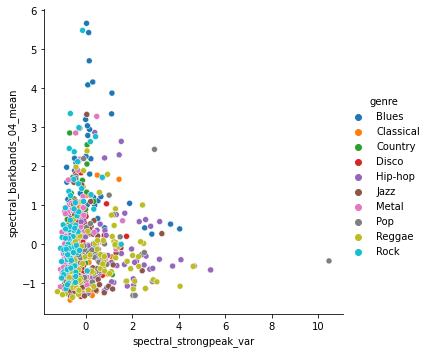

In [ ]:
# Let's visualize all the music genres plotted according to two random features. We use the seaborn library to make a scatterplot of the two random features.
feature_names = df.keys()[:-1]
x_name = random.choice(feature_names)
y_name = random.choice(feature_names)

while x_name == y_name:
  y_name = random.choice(feature_names)

sns.relplot(x = x_name, y = y_name, hue = "genre", data = df);

In [ ]:
df_modif = df.copy()

In [ ]:
# SVM classification requires numerical data, so we remove the non-numeric columns from the dataframe (except for the genre label).
non_floats = []
for col in df_modif.iloc[:,:-1]:
    if df_modif[col].dtypes != "float64":
        non_floats.append(col)
df_modif = df_modif.drop(columns=non_floats)

In [ ]:
df_modif

,highlevel_danceability_value,highlevel_equalization_profile_value,highlevel_excitement_value,highlevel_intensity_value,loudness_dynamic_complexity_dvar,loudness_dynamic_complexity_mean,loudness_dynamic_complexity_var,loudness_larm_dvar,loudness_larm_mean,loudness_larm_var,...,tonal_chords_number_rate_value,tonal_chords_strength_dvar,tonal_chords_strength_mean,tonal_chords_strength_var,tonal_dissonance_dvar,tonal_dissonance_mean,tonal_dissonance_var,tonal_key_strength_value,tonal_tuning_equal_tempered_deviation_value,genre
0,0.206472,0.372766,0.029087,0.093526,-0.411385,0.024215,-0.201421,-0.532833,0.702348,-0.304162,...,-1.407427,-0.255337,1.140774,-1.490395,0.494393,0.149725,-0.013634,0.526779,-0.205793,Blues
1,-0.368479,0.372766,1.341977,0.093526,-0.349921,-0.015672,-0.173045,-0.452769,-0.365326,-0.330522,...,-0.636402,-0.121114,0.497749,-0.901662,0.347729,-0.517640,0.184709,-0.129683,-0.667979,Blues
2,-0.631747,0.372766,-1.283803,-1.324366,4.235612,5.779127,3.973258,1.713613,-1.889279,0.416157,...,-1.021915,-0.190639,1.408974,-0.502029,1.174496,-1.454160,2.144489,-1.022781,0.937795,Blues
3,-0.190116,0.372766,1.341977,0.093526,-0.307576,0.068818,-0.216986,-0.519222,-0.185776,-0.218878,...,-1.021915,0.257633,0.622749,1.399033,0.791524,-0.601227,0.873673,0.074454,-0.406373,Blues
4,0.588278,0.372766,1.341977,0.802473,-0.332032,-1.078238,0.350680,-0.765884,-0.473132,-0.293164,...,-0.636402,-0.309481,1.301291,-0.708195,-0.093155,0.287901,-0.644858,0.919307,-0.917709,Blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,-1.427786,0.372766,-1.283803,0.802473,0.559649,-0.183165,0.622257,0.084044,-1.465872,0.031107,...,-0.636402,-0.366172,0.318132,0.748104,-0.745670,-0.226276,-0.095535,1.322209,0.061931,Rock
796,-0.078540,0.372766,1.341977,0.802473,-0.108340,-0.584670,0.119356,-0.314633,0.037131,-0.258317,...,-1.021915,-0.284281,0.096984,-0.089204,-1.394305,1.206240,-1.225032,0.498037,-0.269263,Rock
797,-1.045058,0.372766,-1.283803,0.093526,-0.156503,-0.975097,0.297968,-0.315637,-1.013498,0.647687,...,-0.250890,-0.408811,-1.467413,-0.965934,-0.713245,0.178487,0.002003,-0.624586,-1.079980,Rock
798,-0.227043,0.372766,-1.283803,0.802473,-0.125633,-1.068999,0.274430,-0.725643,0.474377,-0.348287,...,-0.636402,-0.329513,1.205735,-0.789754,-0.415943,0.386272,-0.764152,0.417567,-0.522861,Rock


In [ ]:
# We use a MinMaxScaler to normalize the features between 0 and 1.
L = len(df_modif.columns)

min_max_scaler = preprocessing.MinMaxScaler()
df_modif.iloc[:,:L-1] = min_max_scaler.fit_transform(df_modif.iloc[:,:L-1].values)

In [ ]:
# It is important to check how many samples there are for each genre to see if the data is balanced.
df_modif.genre.value_counts()
# The given data is already well balance so no further preprocessing is necesary.

Blues        80
Classical    80
Country      80
Disco        80
Hip-hop      80
Jazz         80
Metal        80
Pop          80
Reggae       80
Rock         80
Name: genre, dtype: int64

In [ ]:
# All the features are put into a matrix
X = df_modif.iloc[:,:L-1].values 
# Genre tags are converted to categorical data
df_modif.genre = pd.Categorical(df_modif.genre)
# Each genre is encoded as a numrical code
y = np.array(df_modif.genre.cat.codes)

In [ ]:
# The data is split between a test set and a train set. In this case I'm using a 80/20 distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)

# Check sizes of input and output vectors
print("Size of train features matrix: ",X_train.shape, ", Size of train output vector: ",y_train.shape)
print("Size of test features matrix: ",X_test.shape, ", Size of test output vector: ",y_test.shape)

Size of train features matrix:  (640, 237) , Size of train output vector:  (640,)
Size of test features matrix:  (160, 237) , Size of test output vector:  (160,)


In [ ]:
# Create an SVM object with a linear kernel
clf = svm.SVC(kernel='linear')

# Fit the model to the training data (X_train contains the features and y_train contains the genre labels)
clf.fit(X_train, y_train)

# Use the trained model to predict the genre labels of the test data
y_pred = clf.predict(X_test)

In [ ]:
# Use 10-fold cross-validation to compute the accuracy of the model
accuracy = cross_val_score(clf, X, y, cv=10)
mean_accuracy = accuracy.mean()

print("Accuracy: ", mean_accuracy)

Accuracy:  0.825


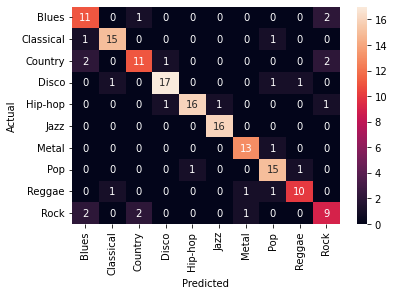

In [ ]:
# Plot a confusion matrix to visualize how well the model is performing
classes = np.unique(df_modif.genre)
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = classes, index = classes)
conf_mat.index.name = 'Actual'
conf_mat.columns.name = 'Predicted'
sns.heatmap(conf_mat, annot = True);

<Axes: >

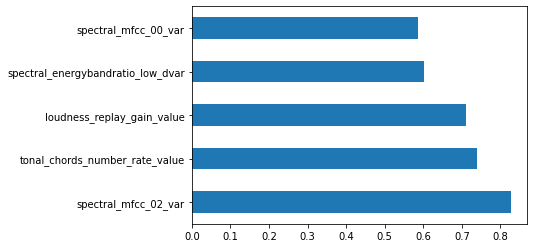

In [ ]:
# Find the 5 features with the largest weight on the classification
pd.Series(abs(clf.coef_[0]), index=df_modif.iloc[:,:L-1].columns).nlargest(5).plot(kind='barh')

## Results
The classification is not perfect but we can see that the missclassifications is probably due to the similarity between genres (country/blues, classical/jazz, rock/country ...)